In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
gender_count = df['sex'].value_counts()

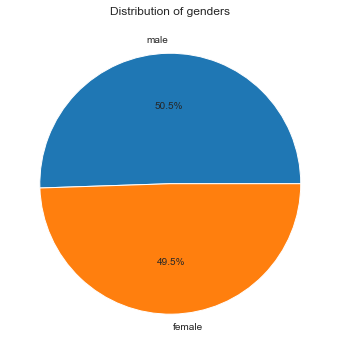

In [6]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')
plt.title("Distribution of genders")
plt.show()

In [7]:
region_count = df['region'].value_counts()
smoker_count = df['smoker'].value_counts()


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

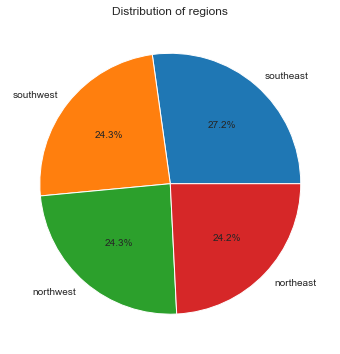

In [9]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plt.pie(region_count,labels=region_count.index,autopct='%1.1f%%')
plt.title("Distribution of regions")
plt.show()

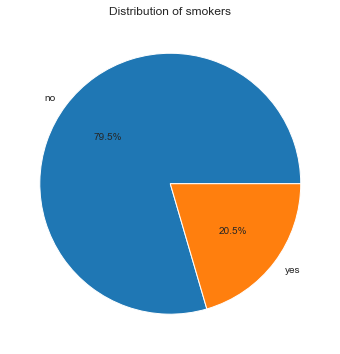

In [10]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
plt.pie(smoker_count,labels=smoker_count.index,autopct='%1.1f%%')
plt.title("Distribution of smokers")
plt.show()

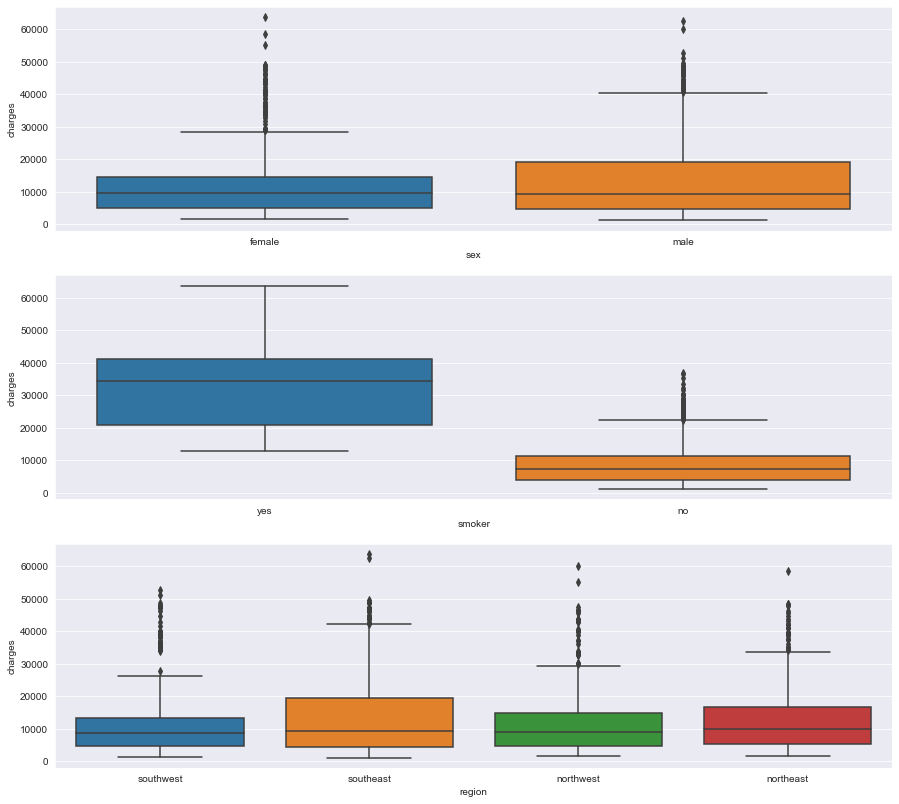

In [11]:
#Detecting Outliers
#Using Box plot, but can also be done using z score (data point-mean/std) or IQR 
#outliers in IQR: Q1 - 1.5IQR and Q3 + 1.5*IQR where IQR can be found by Q3 - Q1
fig,ax = plt.subplots(3,1,figsize=(15,14))
ax=ax.flatten()
df_categorical=df.drop(columns=['age','bmi','children'])
for i, col in enumerate(df_categorical.columns[:-1]):
    sns.boxplot(x=df[col],y=df_categorical['charges'],ax=ax[i])
    #plt.title(column)


<AxesSubplot:xlabel='charges'>

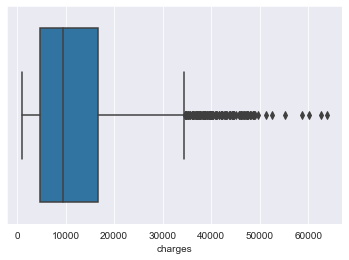

In [12]:
sns.boxplot(data = df, x='charges')


In [13]:
df['charges']= sorted(df['charges'])

In [14]:
#Q1 = np.percentile(df['charges'], 25)
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)

In [15]:
#Q3 = np.percentile(df['charges'], 75)
print(Q3)
IQR = Q3 - Q1
IQR

16639.912515


11899.625365

In [16]:
lower_bound =(1.5 * IQR) -  Q1 
lower_bound 

13109.1508975

In [17]:
upper_bound= Q3 + (1.5 * IQR)
upper_bound

34489.350562499996

In [18]:
df_without_outlier = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]
df_without_outlier

age     sex     bmi  children smoker     region      charges
908    63    male  39.800         3     no  southwest  13112.60480
909    32  female  24.600         0    yes  southwest  13126.67745
910    22    male  28.310         1     no  northwest  13129.60345
911    18    male  31.730         0    yes  northeast  13143.33665
912    59  female  26.695         3     no  northwest  13143.86485
...   ...     ...     ...       ...    ...        ...          ...
1194   31  female  21.755         0     no  northwest  34166.27300
1195   19  female  27.930         3     no  northwest  34254.05335
1196   19  female  30.020         0    yes  northwest  34303.16720
1197   41    male  33.550         0     no  southeast  34439.85590
1198   40    male  29.355         1     no  northwest  34472.84100

[291 rows x 7 columns]

In [19]:
df['charges'].min()

1121.8739

<AxesSubplot:xlabel='charges'>

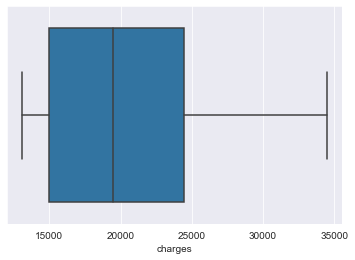

In [20]:
sns.boxplot(data = df_without_outlier, x='charges')


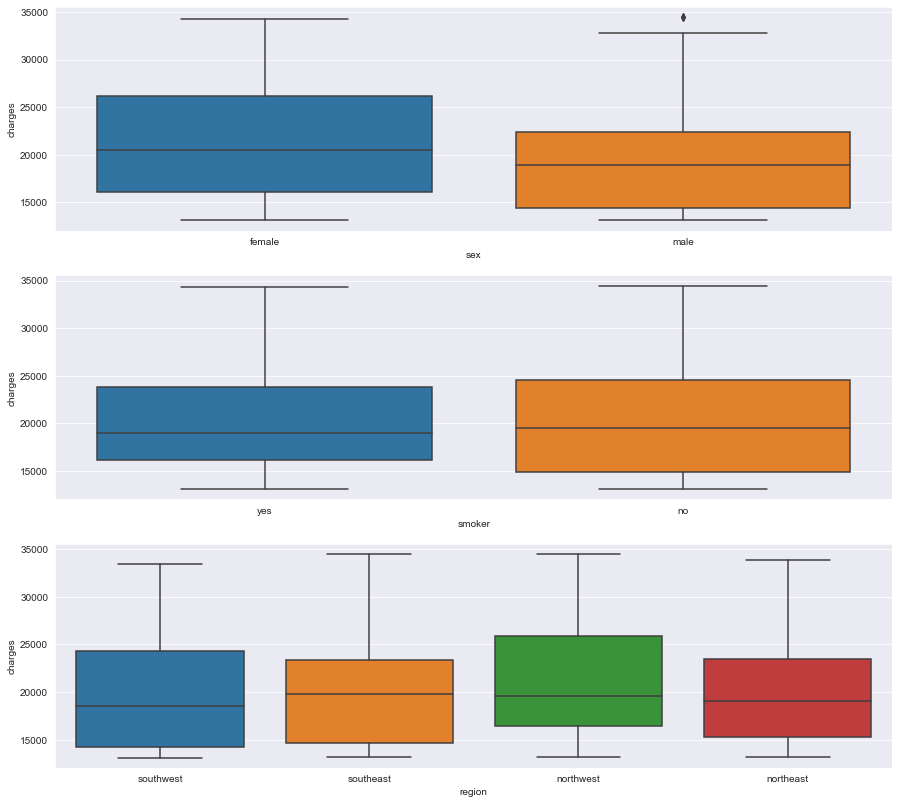

In [21]:
#Detecting Outliers
#Using Box plot, but can also be done using z score (data point-mean/std) or IQR 
#outliers in IQR: Q1 - 1.5IQR and Q3 + 1.5*IQR where IQR can be found by Q3 - Q1
fig,ax = plt.subplots(3,1,figsize=(15,14))
ax=ax.flatten()
df_categorical=df_without_outlier.drop(columns=['age','bmi','children'])
for i, col in enumerate(df_categorical.columns[:-1]):
    sns.boxplot(x=df[col],y=df_categorical['charges'],ax=ax[i])
    #plt.title(column)


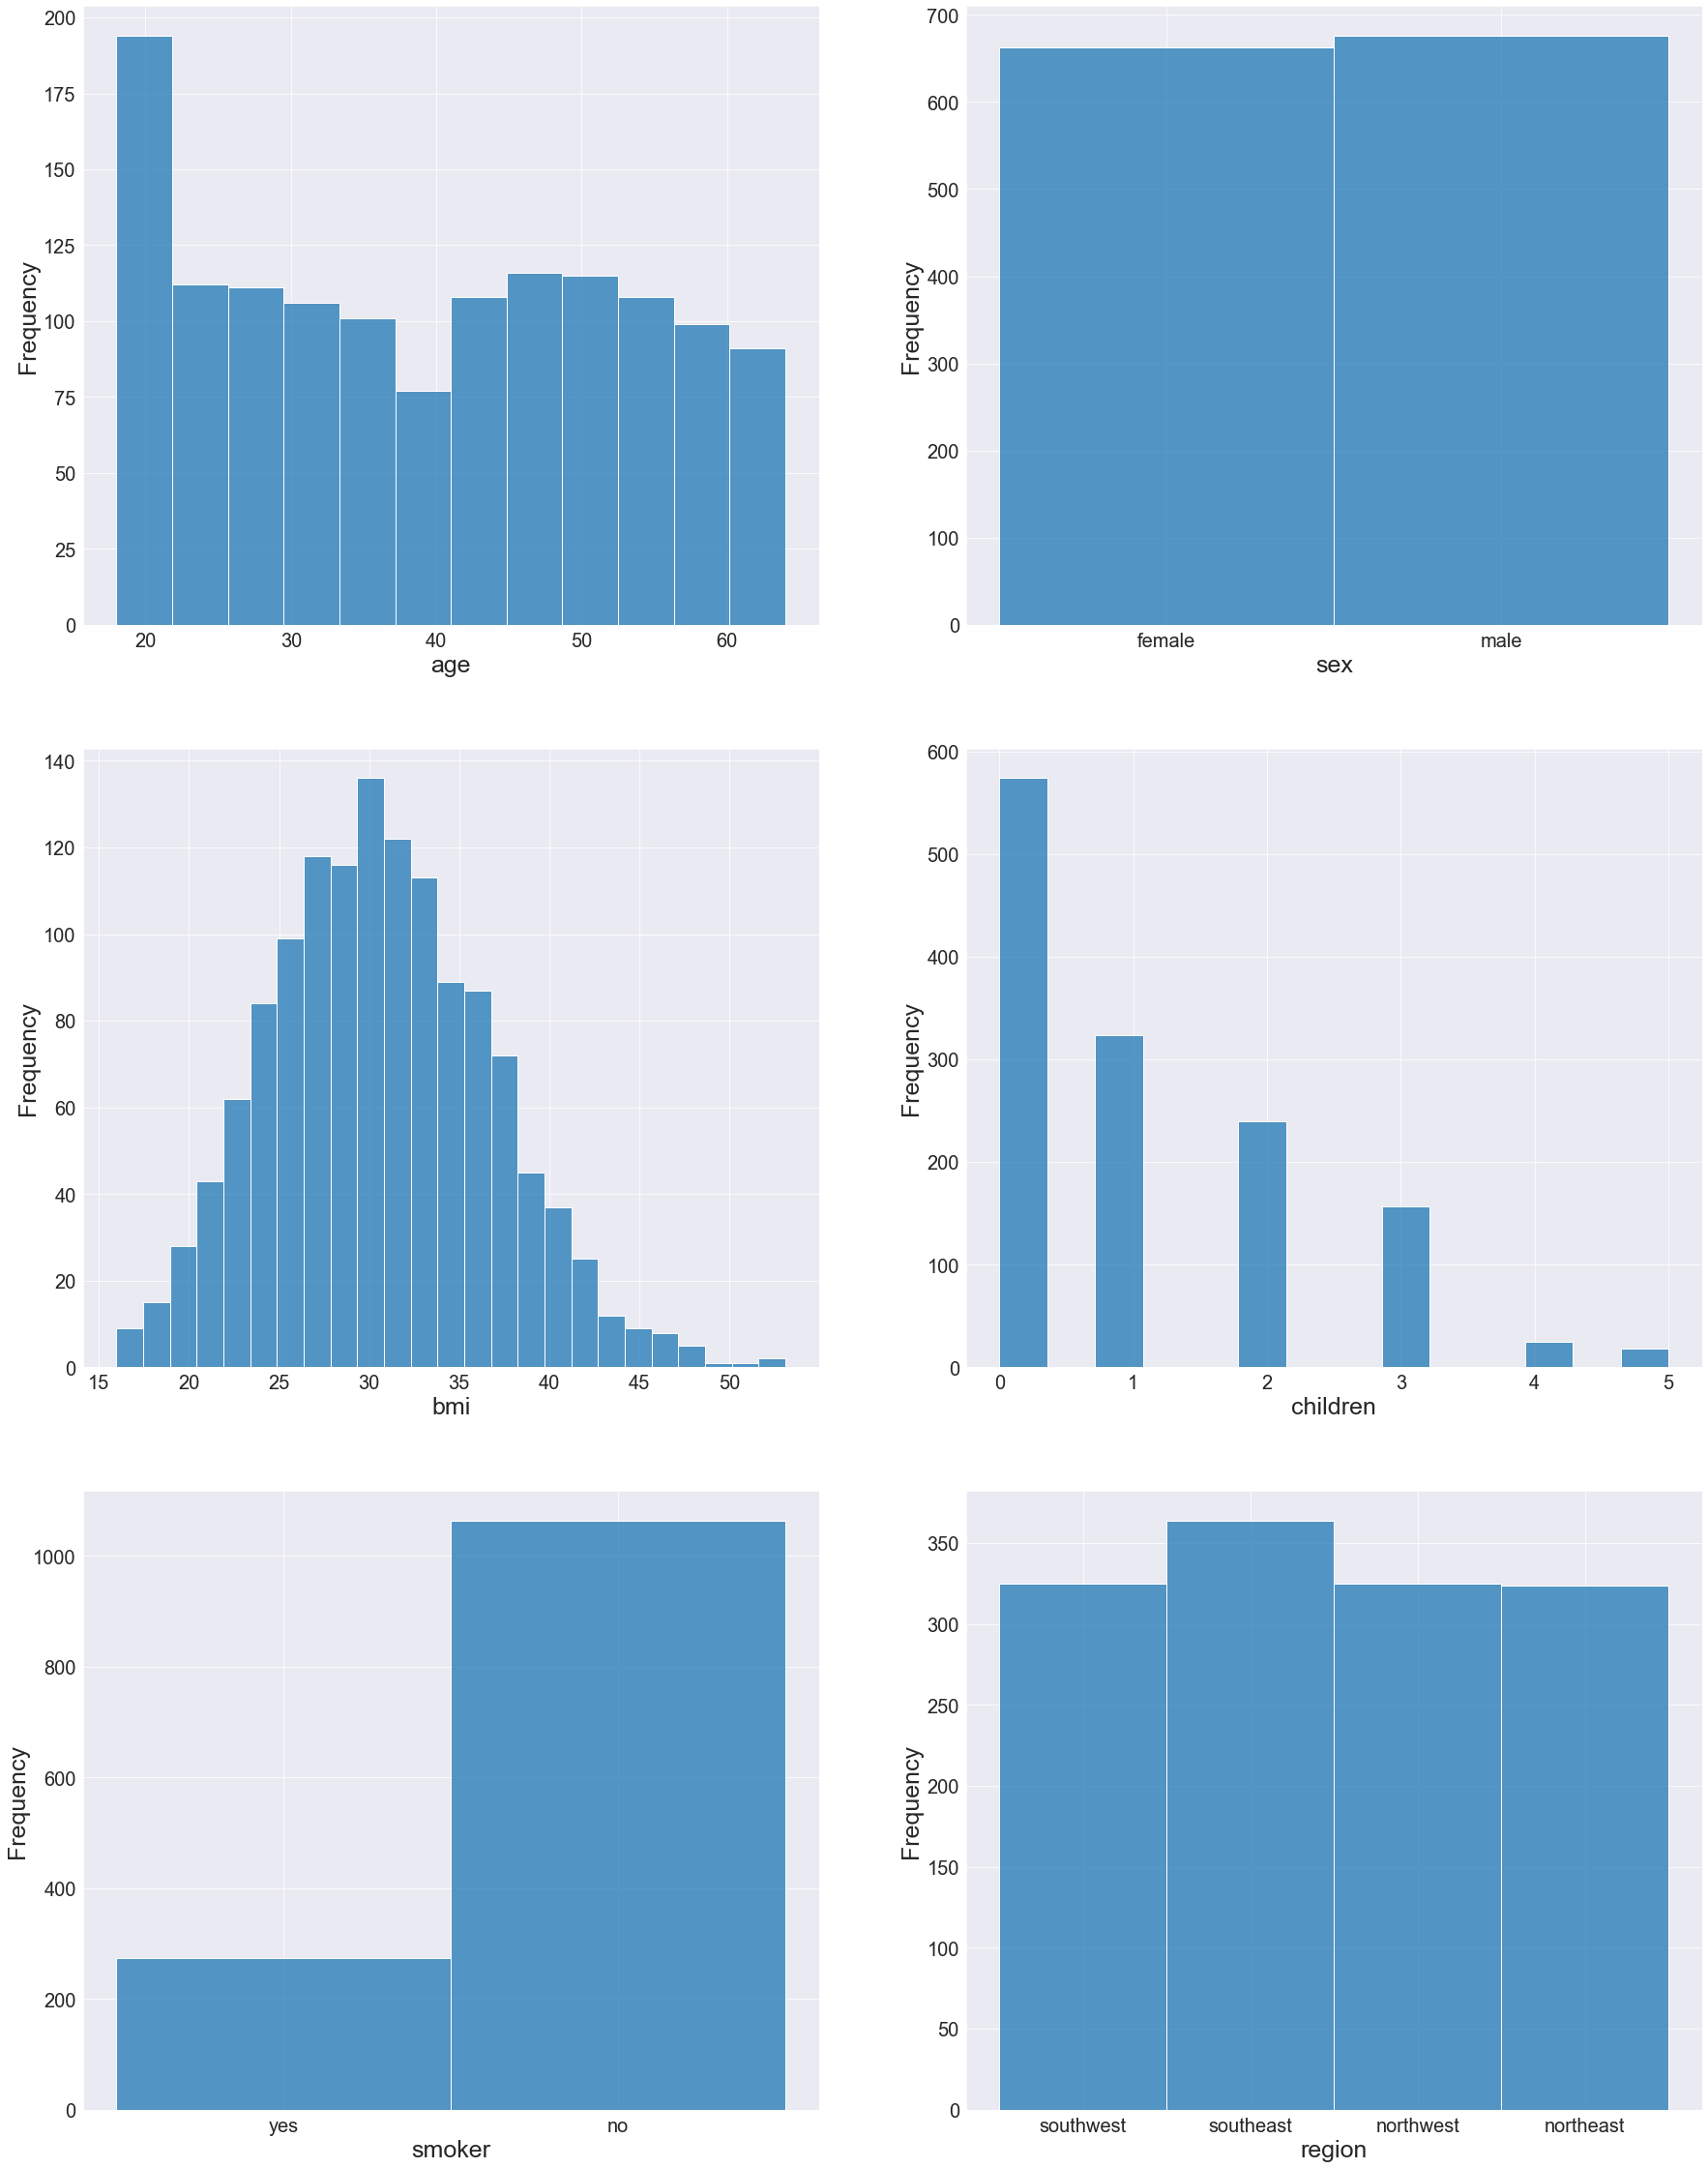

In [22]:
fig, ax = plt.subplots(3,2,figsize=(30,40))
ax=ax.flatten()
for index, column in enumerate(df.columns[:-1]):
    
  #  row = index // 3   # Determine the row number
   # col = index % 3    # Determine the column number
    
    sns.histplot(data=df, x=df[column], ax=ax[index])
    # Set title with font size
    #ax[index].set_title(column, fontsize=30)
    
    # Optionally set x and y labels with font size 
    ax[index].set_xlabel(column, fontsize=25)
    ax[index].set_ylabel('Frequency', fontsize=25)
    
    ax[index].tick_params(axis='x', labelsize=20)
    ax[index].tick_params(axis='y', labelsize=20)
   


plt.show()


<AxesSubplot:>

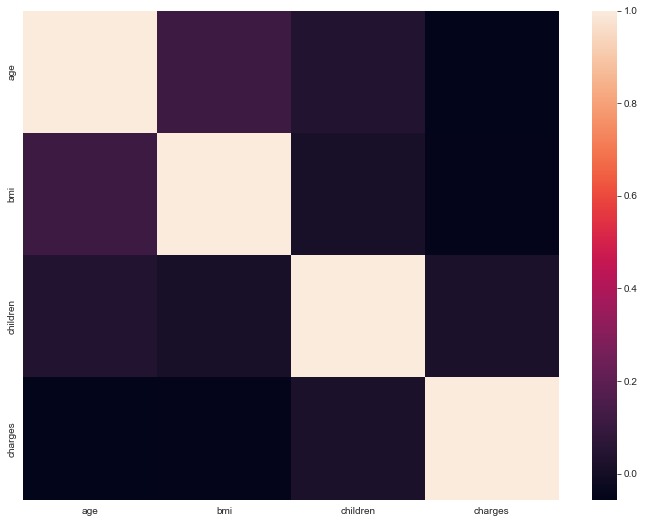

In [23]:
#Feature correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

#Interpretation: Children has no correlation to charges, bmi or age

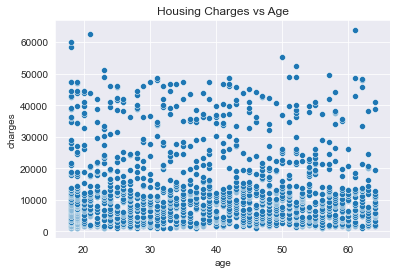

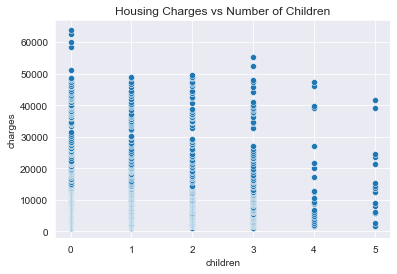

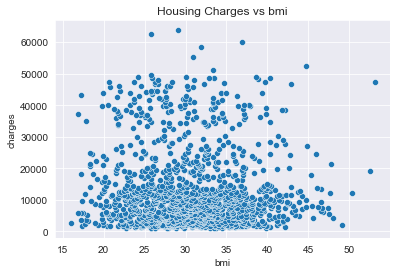

In [24]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Housing Charges vs Age')
plt.show()

sns.scatterplot(x='children', y='charges', data=df)
plt.title('Housing Charges vs Number of Children')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Housing Charges vs bmi')
plt.show()

#Interpretation
#Age and bmi generally has a positive correlation with charges while children does not
#have any significant relationship with charges

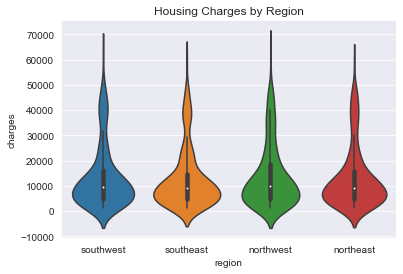

"'\nThe width of the violin plot at any given value represents the density of data points at that value.\nA fatter or wider section indicates that a larger number of observations (higher density) fall within that range of the data. This means that many data points are concentrated in that area.\nIn this case, there are a lot of south west people who are paying similar charges in that category.\n2. Height of the Violin Plot\nHeight of the Violin Plot:\nThe height of the violin plot corresponds to the range of the data, from the minimum to the maximum values.\nA taller violin indicates a larger range of values within that category.\nShorter Violin Plot: A violin plot that is shorter indicates that the data in that category has a more limited range—\nit doesn’t extend as far in either direction (lower variability).\nExample: In this case, southwest has a shorter violin plot compared to another, meaning that housing charges are less variable\nand more consistent."

In [25]:
#violin plot similar to box and whisker but provide more info on distribution of data.
#violin provides density of data at a given y value
#KDE: The main shape of the violin plot,which represents the distribution of the data.
#Central Vertical Line: Represents the range from the minimum to the maximum of the data.
#Horizontal Line or Point in the Middle: This usually represents the median of the data.
#Box in the Middle: Represents the interquartile range (IQR) with the median marked by a line or point.
sns.violinplot(x='region', y='charges', data=df)
plt.title('Housing Charges by Region')
plt.show()
#Interpretation
#Width of the Violin Plot (Fatness)
''''
The width of the violin plot at any given value represents the density of data points at that value.
A fatter or wider section indicates that a larger number of observations (higher density) fall within that range of the data. This means that many data points are concentrated in that area.
In this case, there are a lot of south west people who are paying similar charges in that category.
2. Height of the Violin Plot
Height of the Violin Plot:
The height of the violin plot corresponds to the range of the data, from the minimum to the maximum values.
A taller violin indicates a larger range of values within that category.
Shorter Violin Plot: A violin plot that is shorter indicates that the data in that category has a more limited range—
it doesn’t extend as far in either direction (lower variability).
Example: In this case, southwest has a shorter violin plot compared to another, meaning that housing charges are less variable
and more consistent.'''

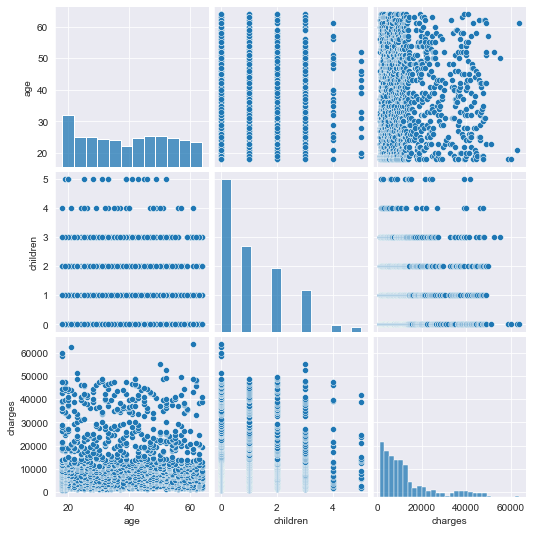

In [26]:
sns.pairplot(df, vars=['age', 'children', 'charges'])
plt.show()


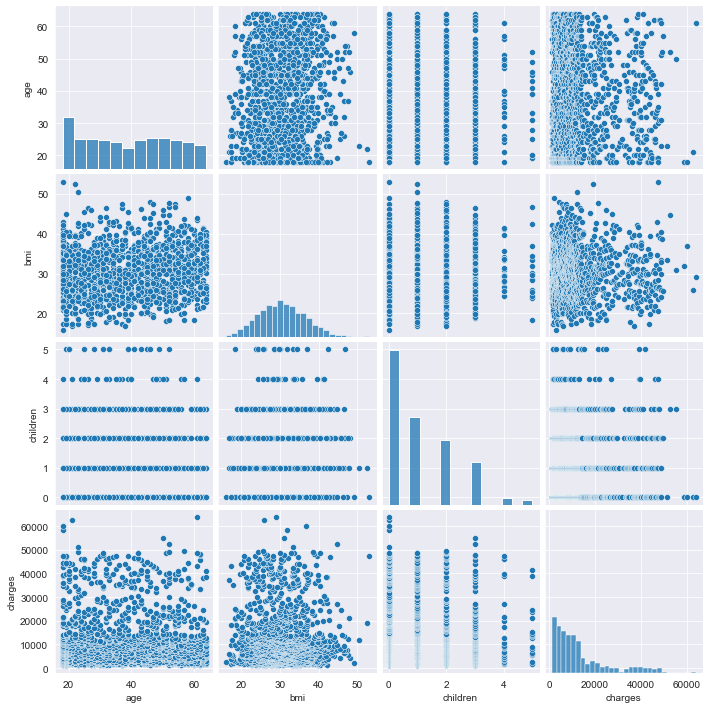

In [27]:
sns.pairplot(df)
plt.show()


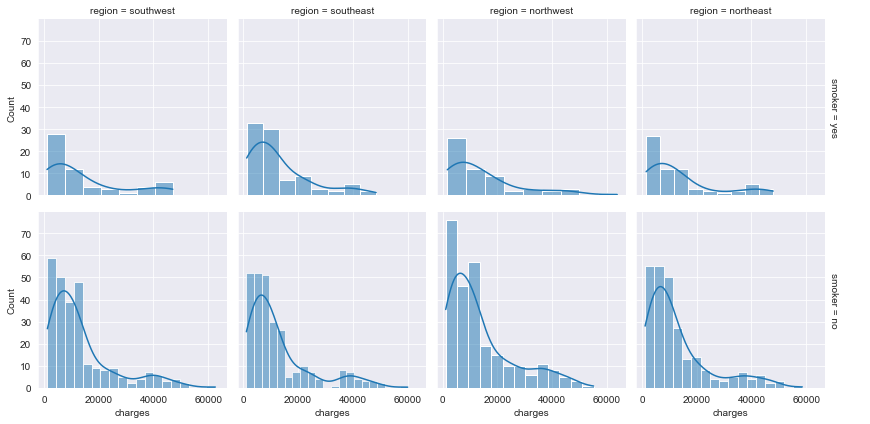

In [28]:
g = sns.FacetGrid(df, col="region", row="smoker", margin_titles=True)
g.map(sns.histplot, "charges", kde=True)
g.add_legend()
plt.show()


In [29]:
def one_hot_encoding(df,col_names: list):
    #Encoding
    for col_name in col_names:

        distinct_val = np.unique(df[col_name])
        n_col = len(distinct_val)  # Get the number of columns

        # Create a mapping from each unique value to its index
        val_to_index = {val: idx for idx, val in enumerate(distinct_val)}

        final_arr = []
        for i in df[col_name]:
            # Use the mapping to find the correct index for the '1'
            index = val_to_index[i]
            new_arr = [1 if j == index else 0 for j in range(n_col)]
            final_arr.append(new_arr)

        # Convert the list of encoded rows into a DataFrame
        encoded_df = pd.DataFrame(final_arr, columns=[f'{col_name}_{val}' for val in distinct_val])

        # Concatenate the original DataFrame with the encoded DataFrame (add columns)
        df = pd.concat([df, encoded_df], axis=1)

        # Drop the original 'sex' column if no longer needed
        df = df.drop(columns=[col_name], axis=1)
    
    return df

    

In [30]:
df = one_hot_encoding(df,['sex','smoker','region'])

In [31]:
df

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0   1121.87390           1         0          0   
1      18  33.770         1   1131.50660           0         1          1   
2      28  33.000         3   1135.94070           0         1          1   
3      33  22.705         0   1136.39940           0         1          1   
4      32  28.880         0   1137.01100           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  55135.40209           0         1          1   
1334   18  31.920         0  58571.07448           1         0          1   
1335   18  36.850         0  60021.39897           1         0          1   
1336   21  25.800         0  62592.87309           1         0          1   
1337   61  29.070         0  63770.42801           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]